# Regressione lineare attraverso la discesa del gradiente

**Disclaimer** voi ne sapete certamente più di me su come si usa la regressione lineare, e probabilmente anche di come si calcola la discesa del gradiente! Lo scopo di questo esercizo è solo quello di mostrarvi con un esempio concreto come si possono eseguire dei calcoli e degli algoritmi utili usando `numpy`.

Peraltro pacchetti come `scipy` (un parente stretto di `numpy`) contengono già delle implementazioni questi algoritmi. Prendete quindi questo come un semplice esercizio per far pratica con `numpy`.

Fonti: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

Fonte dati: https://github.com/jdwittenauer/ipython-notebooks/blob/master/data/ex1data1.txt


# La "storia" 

Supponiamo di essere i presidenti di una compagnia di ristorazione che ha diversi punti vendita in giro per il paese. Dobbiamo decidere se e dove aprire altri punti vendita, e visto che abbiamo già dei punti vendita in attività, abbiamo dei dati che indicano il profitto ottenuto e la popolazione presente, nelle zone già servite. Prima di prendere delle decisioni commerciali potremmo stimare il profitto medio, in base alla popolazione presente nella zona servita.

Utilizzeremo un **modello lineare** del tipo
$$
    \text{Profitto} = A \cdot \text{Popolazione} + B
$$
e quindi utilizzeremo i dati che abbiamo per cercare di capire come impostare i parametri $A$ e $B$ del modello perché il modello abbia un qualche valore predittivo.

# Otteniamo i dati dal web

I dati sono presenti su un file pubblico, che si può trovare su internet. Il file è in formato *CSV* (comma,separated, value). Ci sono molte librerie python che permettono di leggere ed elaborare dati tabellari e dataframes in maniera molto comoda, ad esempio `pandas`. Non tratteremo questa libreria. Sappiate solo che adesso abbiamo un array `pop` con la popolazione e uno `prof` con i profitti.  

In [2]:
import pandas as pd
data = pd.read_csv('datigradiente.txt', header=None, names=['Popolazione', 'Profitti'])
data

,Popolazione,Profitti
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
import numpy as np

pop=np.array(data['Popolazione'])
prof=np.array(data['Profitti'])

pop.dtype,prof.dtype

(dtype('float64'), dtype('float64'))

## Plot preliminare dei dati

Mostriamo uno `scatterplot` che visualizzi i dati. 

Negli esempi precedenti abbiamo usato `matplotlib`, che è certamente un ottimo strumento, senza soffermarci troppo sui suoi dettagli. La maniera più semplice per usarla è quella di importare il modulo `matplotlib.pyplot` e poi di usare le funzioni ivi contenute, come `plot`, `grid`, `figure`, `show`, `matshow` e in questo caso `scatter`.

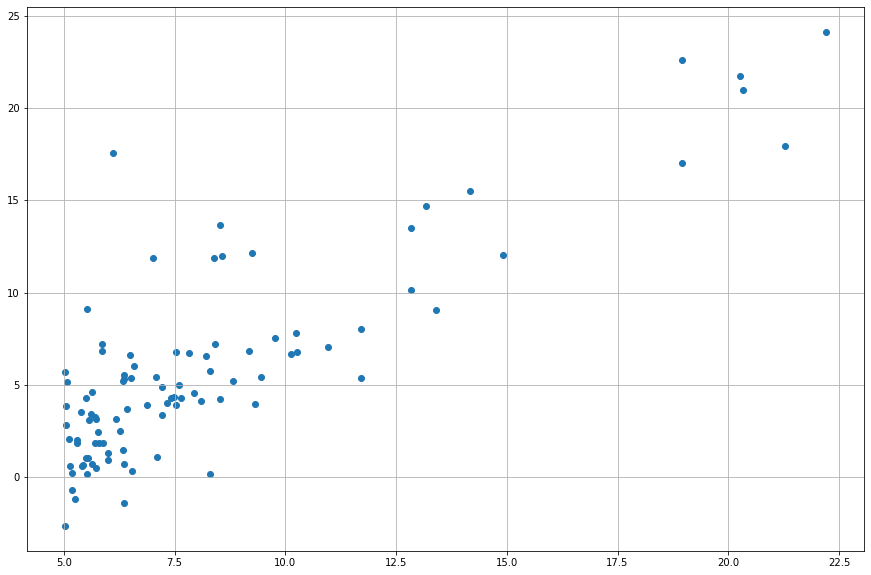

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.grid(True)
plt.scatter(pop,prof)

## Loss function


Lo scopo è definire una funzione lineare $z(x) = A * x + B$, che possa modellare la relazione tra popolazione e profitto.

Definiamo 

- $x$ la popolazione
- $y$ il profitto
- $z(x)$ il profitto previsto dal modello lineare
 

Per misurare la bontà del modello utilizziamo come *funzione di costo* la media dei quadrati delle differenze tra valore predetto e valore effettivo.

$$
L(z) = \frac{1}{n} \sum_i (y_i - z(x_i))^2
$$

dove $n$ è il numero di rilevazioni. Riscrivendo $z$ con il modello lineare che vogliamo stimare possiamo scrivere la funzione di costo come

$$
L(A,B) = \frac{1}{n} \sum_i (y_i - A x_i - B)^2
$$

## Il metodo della discesa del gradiente

Non andremo nello specifico, vi basti sapere che l'idea del metodo della discesa del gradiente è quello di calcolare le derivate parziali rispetto ai parametri (in questo caso $A$ e $B$) della funzione di errore.

Conoscere le derivate parziali vi permette di sapere qual è la **direzione** nello spazio dei parametri $A$,$B$ per la quale l'errore cresce nella maniera più ripida. L'idea è quindi modificare i parametri $A$ e $B$ per farli andare nella direzione opposta.

Derivata di $L$ ripsetto ad $A$:
$$
\frac{\partial L}{\partial A} = \frac{1}{n} \sum_i 2(y_i - A x_i - B)(-x_i) = \frac{-2}{n} \sum_i x_i (y_i - z(x_i))
$$

Derivata di $L$ rispetto ad $B$:
$$
\frac{\partial L}{\partial B} = \frac{1}{n} \sum_i 2(y_i - A x_i - B)(-1) = \frac{-2}{n} \sum_i (y_i - z(x_i))
$$

Dunque ad ogni iterazione i valori di $A$ e $B$ saranno corretti utilizzando la regola
$$
A \leftarrow A - r \cdot \frac{\partial L}{\partial A}
$$
e
$$
B \leftarrow B - r \cdot \frac{\partial L}{\partial B}
$$

dove $r$ è un valore piccolo detto learning rate.


In [7]:
# Costruiamo il modello
import numpy as np

# Dati iniziali
x = pop
y = prof

n = len(pop)

# impostiamo i valori iniziali arbitrariamente
z = np.zeros(n)
A = 0
B = 0

r = 0.0001  # learning rate

def iterazione(Aold,Bold):
    "Aggiorna le stime per A,B"
    
    global z
    
    derA = (-2/n) * np.sum( x*(y - z) )
    derB = (-2/n) * np.sum(y - z)

    A = Aold - r * derA
    B = Bold - r * derB
    
    z[:] = A*x + B      # nuova previsione

    err = (1/n) * np.sum((z-y)**2)
    
    return A,B,err



## Ripetiamo il raffinamento del modello 

Quante volte andremo a raffinare il modello? La scelta dipende dal contesto e da informazioni che forse siete in grado di elaborare meglio di me. L'ideale sarebbe arrivare a una funzione di costo pari a zero (nessun errore) tuttavia se i dati non sono lineari si arriverà sempre ad un modello approssimato, che contiene errori.
Il modello poi potrebbe avvicinarsi all'errore minimo molto lentamente, rendendo il calcolo molto lungo. Potremmo adottare i seguenti criteri per interrompere le iterazioni. Ci fermiamo quando

- siamo arrivati ad un errore abbastanza piccolo; 
- abbiamo effettuato troppe iterazioni.


Errore:  21.786650324441908
Round eseguiti: 50


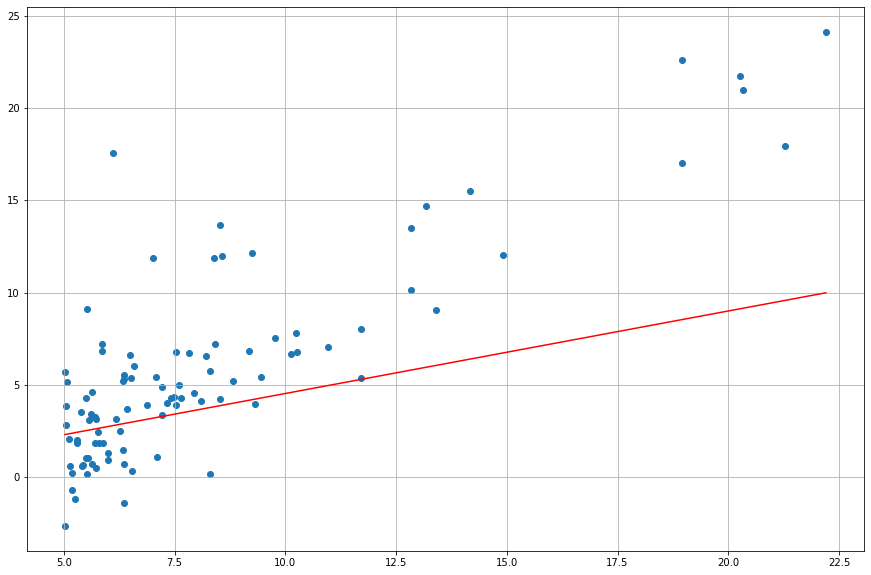

In [8]:
# Raffinamento del modello

maxerr = 10.0
maxrounds = 50

A,B,err=0,0,np.inf

for i in range(maxrounds):

    A,B,err = iterazione(A,B)
    
    if err < maxerr:
        break

print("Errore: ", err)
print('Round eseguiti:', i+1)
       
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.scatter(x, y)
plt.plot([min(x), max(x)], [A*min(x)+B, A*max(x)+B], color='red')  # linear model


## Osserviamo l'evoluzione dell'errore al variare dei parametri

Aggiungiamo un po' di interattività per osservare l'evoluzione del modello.

In [15]:
# Raffinamento del modello
from ipywidgets import interact, IntSlider,FloatSlider

def gradientdescend(maxrounds,maxerr):
    A,B,err=0,0,np.inf
    for i in range(maxrounds):

        if err<maxerr:
            break
        
        A,B,err = iterazione(A,B)
    
    plt.figure(figsize=(15, 10))
    plt.grid(True)
    plt.text(5,22,"Errore: "+ str(err))
    plt.scatter(x, y)
    plt.plot([min(x), max(x)], [A*min(x)+B, A*max(x)+B], color='red')  # regression line
    return plt.gca()
    
    
interact(gradientdescend,
         maxrounds=IntSlider(min=0,max=300,step=10),
         maxerr=FloatSlider(min=0,max=100.0,step=5.0));

interactive(children=(IntSlider(value=0, description='maxrounds', max=300, step=10), FloatSlider(value=0.0, de…